In [16]:
import pandas as pd
import requests
from io import BytesIO

# URL of the Excel file
url = "https://www.berlin.de/sen/wirtschaft/service/daten/windenergieanlagen_in_berlin.xlsx"

# Download the Excel file
response = requests.get(url)
xlsx_data = response.content

# Load the Excel file into a DataFrame
windberlin_df = pd.read_excel(BytesIO(xlsx_data))

# Display the first few rows of the DataFrame
windberlin_df.head()


MaStR-Nr. der Einheit              Anzeige-Name der Einheit Betriebs-Status  \
0       SEE996235868730                                   MM1      In Betrieb   
1       SEE987466160892                   Klein-PV-Anlage_KDN      In Betrieb   
2       SEE992191643879  Windkraft Berlin Nonnendammallee 104      In Betrieb   
3       SEE933693762569                             NEB WEA 2      In Betrieb   
4       SEE938464706001                                 20590      In Betrieb   

  Inbetriebnahmedatum der Einheit Registrierungsdatum der Einheit  \
0                      2021-10-20                      2021-10-25   
1                      1995-11-21                      2021-01-31   
2                      2016-10-26                      2021-01-19   
3                      2014-11-05                      2020-12-21   
4                      2004-12-31                      2020-09-29   

  Energieträger  Bruttoleistung der Einheit  Nettonennleistung der Einheit  \
0          Wind                      4200.0                         4200.0   
1          Wind                         1.8                            1.8   
2          Wind                         1.0                            1.0   
3          Wind                      2300.0                         2300.0   
4          Wind                      2000.0                         2000.0   

   Postleitzahl     Ort Name des Anlagenbetreibers (nur Org.)  \
0         13051  Berlin           Mühle Malchow GmbH & Co. KG   
1         12621  Berlin                   (natürliche Person)   
2         13629  Berlin            Siemens Aktiengesellschaft   
3         13125  Berlin  NEB Neue Energie Berlin GmbH & Co.KG   
4         10711  Berlin    Elfte Windkraftanlage ApS & Co. KG   

  \tMaStR-Nr. des Anlagenbetreibers Letzte Aktualisierung  
0                   ABR926311013396            2021-10-25  
1                   ABR973176232561            2021-01-31  
2                   ABR905345404783            2021-06-21  
3                   ABR907998267098            2020-12-21  
4                   ABR973374044461            2021-09-17

In [21]:


selected_columns = [
    'Registrierungsdatum der Einheit',
    'Bruttoleistung der Einheit',
    'Nettonennleistung der Einheit',
    'Name des Anlagenbetreibers (nur Org.)'
]


new_windberlin_df = windberlin_df[selected_columns].copy()

new_windberlin_df.head() 


Registrierungsdatum der Einheit  Bruttoleistung der Einheit  \
0                      2021-10-25                      4200.0   
1                      2021-01-31                         1.8   
2                      2021-01-19                         1.0   
3                      2020-12-21                      2300.0   
4                      2020-09-29                      2000.0   

   Nettonennleistung der Einheit Name des Anlagenbetreibers (nur Org.)  
0                         4200.0           Mühle Malchow GmbH & Co. KG  
1                            1.8                   (natürliche Person)  
2                            1.0            Siemens Aktiengesellschaft  
3                         2300.0  NEB Neue Energie Berlin GmbH & Co.KG  
4                         2000.0    Elfte Windkraftanlage ApS & Co. KG

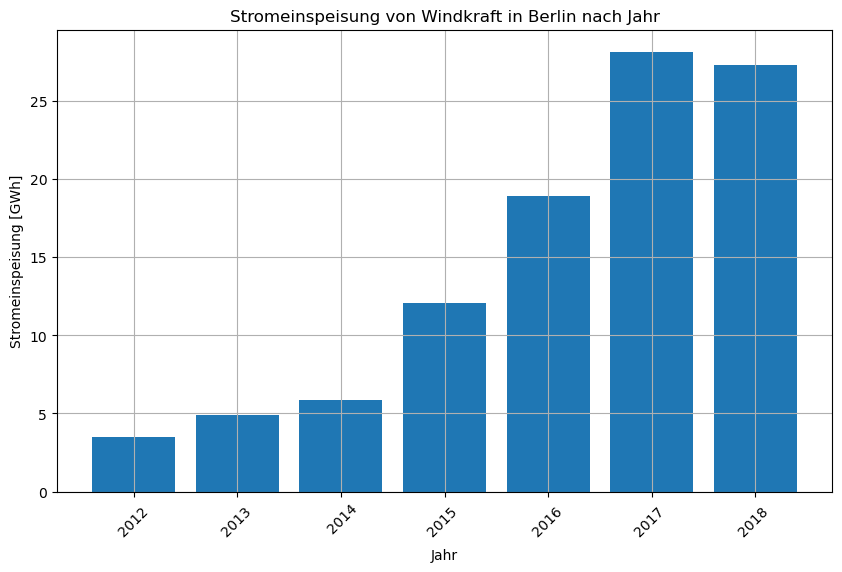

In [17]:

import pandas as pd
import matplotlib.pyplot as plt

# Daten für das DataFrame
data = {
    " 2012 ": [3.48],
    " 2013 ": [4.91],
    " 2014": [5.88],
    "2015 ": [12.05],
    " 2016 ": [18.91],
    "2017 ": [28.16],
    "2018 ": [27.29]
}


df = pd.DataFrame(data)

# Umformen des DataFrames für das Plotten mit der ersten Spalte auf der X-Achse und der zweiten Spalte auf der Y-Achse
df_transposed = df.T.reset_index()
df_transposed.columns = ['Jahr', 'Stromeinspeisung']

# Plotten der Daten als Balkendiagramm
plt.figure(figsize=(10, 6))
plt.bar(df_transposed['Jahr'], df_transposed['Stromeinspeisung'])
plt.title('Stromeinspeisung von Windkraft in Berlin nach Jahr')
plt.xlabel('Jahr')
plt.ylabel('Stromeinspeisung [GWh]')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


